In [1]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
import ast
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud, STOPWORDS


In [2]:
# Read cleaned tweet data as DataFrame
df = pd.read_csv('cleaned_tweets_combined.csv')
df

,date_time,coord,place,label,hashtags,tweet
0,2021-06-01 00:33:58+00:00,"Coordinates(longitude=-95.823268, latitude=29....","Place(fullName='Houston, TX', name='Houston', ...",us_ce,NaN,"I guess he’s never spoken to the Navajo, Shosh..."
1,2021-06-01 00:34:00+00:00,"Coordinates(longitude=-122.452708, latitude=40...","Place(fullName='Redding, CA', name='Redding', ...",us_ce,NaN,WE NEED A MANHATTEN PROJECT TO CLEAN UP PLASTI...
2,2021-06-01 00:58:15+00:00,"Coordinates(longitude=-75.7887564, latitude=38...","Place(fullName='Delaware, USA', name='Delaware...",us_ce,"['MustangMachE', 'ElectricVehicles', 'Tesla', ...",Really?! We ordered the #MustangMachE on April...
3,2021-06-01 01:56:14+00:00,"Coordinates(longitude=-88.0966885, latitude=41...","Place(fullName='Downers Grove, IL', name='Down...",us_ce,"['climate', 'FossilFreeFuture', 'CleanEnergy',...",TONIGHT: There are only a few hours left to pa...
4,2021-06-01 02:57:52+00:00,"Coordinates(longitude=-118.017789, latitude=33...","Place(fullName='Anaheim, CA', name='Anaheim', ...",us_re,NaN,Water is infinite. Energy to access it can be ...
...,...,...,...,...,...,...
17251,2022-05-31 23:07:40+00:00,"Coordinates(longitude=-86.999431, latitude=40....","Place(fullName='West Lafayette, IN', name='Wes...",us_re,['cleanenergy'],The second area of strategic partnership highl...
17252,2022-05-31 23:26:52+00:00,"Coordinates(longitude=-115.384091, latitude=36...","Place(fullName='Las Vegas, NV', name='Las Vega...",us_re,NaN,Here at NV Energy's headquarters where is spea...
17253,2022-05-31 23:27:30+00:00,"Coordinates(longitude=-75.471249, latitude=40....","Place(fullName='Schwenksville, PA', name='Schw...",us_re,NaN,You are so right. To truly be energy independe...
17254,2022-05-31 23:33:57+00:00,"Coordinates(longitude=-115.384091, latitude=36...","Place(fullName='Las Vegas, NV', name='Las Vega...",us_re,NaN,announces two new renewable energy initiatives...


## VADER Sentiment Analysis

In [3]:
## Generate sentiment scores of tweet texts using VADER
score = []

for i in range(df['tweet'].shape[0]):
    neg = analyser.polarity_scores(df['tweet'][i])['neg']
    neu = analyser.polarity_scores(df['tweet'][i])['neu']
    pos = analyser.polarity_scores(df['tweet'][i])['pos']
    compound = analyser.polarity_scores(df['tweet'][i])['compound']

    score.append({'negative': neg, 'neutral': neu, 'positive': pos, 'compound': compound})

sentiment_scores = pd.DataFrame.from_dict(score)
df = df.join(sentiment_scores)
df

,date_time,coord,place,label,hashtags,tweet,negative,neutral,positive,compound
0,2021-06-01 00:33:58+00:00,"Coordinates(longitude=-95.823268, latitude=29....","Place(fullName='Houston, TX', name='Houston', ...",us_ce,NaN,"I guess he’s never spoken to the Navajo, Shosh...",0.108,0.823,0.069,-0.2895
1,2021-06-01 00:34:00+00:00,"Coordinates(longitude=-122.452708, latitude=40...","Place(fullName='Redding, CA', name='Redding', ...",us_ce,NaN,WE NEED A MANHATTEN PROJECT TO CLEAN UP PLASTI...,0.066,0.713,0.221,0.7430
2,2021-06-01 00:58:15+00:00,"Coordinates(longitude=-75.7887564, latitude=38...","Place(fullName='Delaware, USA', name='Delaware...",us_ce,"['MustangMachE', 'ElectricVehicles', 'Tesla', ...",Really?! We ordered the #MustangMachE on April...,0.000,1.000,0.000,0.0000
3,2021-06-01 01:56:14+00:00,"Coordinates(longitude=-88.0966885, latitude=41...","Place(fullName='Downers Grove, IL', name='Down...",us_ce,"['climate', 'FossilFreeFuture', 'CleanEnergy',...",TONIGHT: There are only a few hours left to pa...,0.000,0.809,0.191,0.7777
4,2021-06-01 02:57:52+00:00,"Coordinates(longitude=-118.017789, latitude=33...","Place(fullName='Anaheim, CA', name='Anaheim', ...",us_re,NaN,Water is infinite. Energy to access it can be ...,0.106,0.805,0.089,-0.1027
...,...,...,...,...,...,...,...,...,...,...
17251,2022-05-31 23:07:40+00:00,"Coordinates(longitude=-86.999431, latitude=40....","Place(fullName='West Lafayette, IN', name='Wes...",us_re,['cleanenergy'],The second area of strategic partnership highl...,0.000,0.619,0.381,0.9382
17252,2022-05-31 23:26:52+00:00,"Coordinates(longitude=-115.384091, latitude=36...","Place(fullName='Las Vegas, NV', name='Las Vega...",us_re,NaN,Here at NV Energy's headquarters where is spea...,0.000,0.870,0.130,0.2732
17253,2022-05-31 23:27:30+00:00,"Coordinates(longitude=-75.471249, latitude=40....","Place(fullName='Schwenksville, PA', name='Schw...",us_re,NaN,You are so right. To truly be energy independe...,0.000,0.776,0.224,0.4908
17254,2022-05-31 23:33:57+00:00,"Coordinates(longitude=-115.384091, latitude=36...","Place(fullName='Las Vegas, NV', name='Las Vega...",us_re,NaN,announces two new renewable energy initiatives...,0.000,0.777,0.223,0.6486


In [4]:
## Classifying the scores based on threshold
sentiment_list = []

for i in df['compound']:
    if i > 0.25:
        sentiment_list.append('positive')
    elif i < -0.25:
        sentiment_list.append('negative')
    else:
        sentiment_list.append('neutral')

df['sentiment'] = sentiment_list
df.head()

,date_time,coord,place,label,hashtags,tweet,negative,neutral,positive,compound,sentiment
0,2021-06-01 00:33:58+00:00,"Coordinates(longitude=-95.823268, latitude=29....","Place(fullName='Houston, TX', name='Houston', ...",us_ce,NaN,"I guess he’s never spoken to the Navajo, Shosh...",0.108,0.823,0.069,-0.2895,negative
1,2021-06-01 00:34:00+00:00,"Coordinates(longitude=-122.452708, latitude=40...","Place(fullName='Redding, CA', name='Redding', ...",us_ce,NaN,WE NEED A MANHATTEN PROJECT TO CLEAN UP PLASTI...,0.066,0.713,0.221,0.7430,positive
2,2021-06-01 00:58:15+00:00,"Coordinates(longitude=-75.7887564, latitude=38...","Place(fullName='Delaware, USA', name='Delaware...",us_ce,"['MustangMachE', 'ElectricVehicles', 'Tesla', ...",Really?! We ordered the #MustangMachE on April...,0.000,1.000,0.000,0.0000,neutral
3,2021-06-01 01:56:14+00:00,"Coordinates(longitude=-88.0966885, latitude=41...","Place(fullName='Downers Grove, IL', name='Down...",us_ce,"['climate', 'FossilFreeFuture', 'CleanEnergy',...",TONIGHT: There are only a few hours left to pa...,0.000,0.809,0.191,0.7777,positive
4,2021-06-01 02:57:52+00:00,"Coordinates(longitude=-118.017789, latitude=33...","Place(fullName='Anaheim, CA', name='Anaheim', ...",us_re,NaN,Water is infinite. Energy to access it can be ...,0.106,0.805,0.089,-0.1027,neutral


In [5]:
# Sample of data after applying VADER
df[['tweet','negative','neutral','positive','compound','sentiment']].head()

,tweet,negative,neutral,positive,compound,sentiment
0,"I guess he’s never spoken to the Navajo, Shosh...",0.108,0.823,0.069,-0.2895,negative
1,WE NEED A MANHATTEN PROJECT TO CLEAN UP PLASTI...,0.066,0.713,0.221,0.7430,positive
2,Really?! We ordered the #MustangMachE on April...,0.000,1.000,0.000,0.0000,neutral
3,TONIGHT: There are only a few hours left to pa...,0.000,0.809,0.191,0.7777,positive
4,Water is infinite. Energy to access it can be ...,0.106,0.805,0.089,-0.1027,neutral


### Overall Sentiment Proportion

In [6]:
# Calculate overall sentiment proportion
column_names = ['count', 'percentage']

sentiment_count = df['sentiment'].value_counts()
sentiment_proportion = round(df['sentiment'].value_counts(normalize = True) * 100, 2)

sentiment_df = pd.concat([sentiment_count, sentiment_proportion], axis = 1, keys = column_names)
sentiment_df

,count,percentage
positive,13125,76.06
neutral,2534,14.68
negative,1597,9.25


In [7]:
# Plot overall sentiment proportion in pie chart
pie_chart = px.pie(sentiment_df,
    names = sentiment_df.index,
    values = 'percentage',
    title = 'Overall Sentiment Proportion',
    template = 'gridon',
    color_discrete_sequence = [px.colors.qualitative.Pastel[8], px.colors.qualitative.Pastel[0], px.colors.qualitative.Pastel[2]]
    )

# Plot design
pie_chart.update_traces(pull = [0.1, 0, 0, 0],
    text = sentiment_df.index,
    textposition = 'outside',
    showlegend = False
    )

# Display and save plot as png
pie_chart.show()
pio.write_image(pie_chart, 'Overall Sentiment Proportion.png', width = 400, height = 400)

## Split Data by Region for Aggregated Analysis

In [8]:
## Create new DataFrames for each region
us_df = df[(df['label'] == 'us_re') | (df['label'] == 'us_ce') | (df['label'] == 'us_ge')]
eu_df = df[(df['label'] == 'eu_re') | (df['label'] == 'eu_ce') | (df['label'] == 'eu_ge')]

us_df.reset_index(drop = True, inplace = True)
eu_df.reset_index(drop = True, inplace = True)

us_df.head()

,date_time,coord,place,label,hashtags,tweet,negative,neutral,positive,compound,sentiment
0,2021-06-01 00:33:58+00:00,"Coordinates(longitude=-95.823268, latitude=29....","Place(fullName='Houston, TX', name='Houston', ...",us_ce,NaN,"I guess he’s never spoken to the Navajo, Shosh...",0.108,0.823,0.069,-0.2895,negative
1,2021-06-01 00:34:00+00:00,"Coordinates(longitude=-122.452708, latitude=40...","Place(fullName='Redding, CA', name='Redding', ...",us_ce,NaN,WE NEED A MANHATTEN PROJECT TO CLEAN UP PLASTI...,0.066,0.713,0.221,0.7430,positive
2,2021-06-01 00:58:15+00:00,"Coordinates(longitude=-75.7887564, latitude=38...","Place(fullName='Delaware, USA', name='Delaware...",us_ce,"['MustangMachE', 'ElectricVehicles', 'Tesla', ...",Really?! We ordered the #MustangMachE on April...,0.000,1.000,0.000,0.0000,neutral
3,2021-06-01 01:56:14+00:00,"Coordinates(longitude=-88.0966885, latitude=41...","Place(fullName='Downers Grove, IL', name='Down...",us_ce,"['climate', 'FossilFreeFuture', 'CleanEnergy',...",TONIGHT: There are only a few hours left to pa...,0.000,0.809,0.191,0.7777,positive
4,2021-06-01 02:57:52+00:00,"Coordinates(longitude=-118.017789, latitude=33...","Place(fullName='Anaheim, CA', name='Anaheim', ...",us_re,NaN,Water is infinite. Energy to access it can be ...,0.106,0.805,0.089,-0.1027,neutral


## Volume Analysis

### US Weekly Tweet Volume

In [9]:
# Aggregate tweets by week and count volume
us_df['date'] = pd.to_datetime(us_df['date_time']).dt.date
us_df['week_number'] = pd.to_datetime(us_df['date_time']).dt.week
us_df['week'] = us_df.groupby(['week_number'])['date'].transform('min')
us_vol = us_df.groupby(['week', 'label'])['label'].count().reset_index(name = 'count')
us_vol.head()


/var/folders/sb/3twt_ybj4d93rbpp0wlzly0w0000gn/T/ipykernel_19680/2116206229.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sb/3twt_ybj4d93rbpp0wlzly0w0000gn/T/ipykernel_19680/2116206229.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

/var/folders/sb/3twt_ybj4d93rbpp0wlzly0w0000gn/T/ipykernel_19680/2116206229.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sb/3twt_ybj4d93rbpp0wlzly0w0000gn

,week,label,count
0,2021-06-01,us_ce,89
1,2021-06-01,us_ge,33
2,2021-06-01,us_re,87
3,2021-06-07,us_ce,118
4,2021-06-07,us_ge,42


In [10]:
# Plot US weekly volume data in stacked bar chart
fig = px.bar(us_vol, x = 'week', y = 'count', 
    color = us_vol['label'].map({'us_ce': 'Clean', 'us_re': 'Renewable', 'us_ge': 'Green'}),
    labels = {'label': 'Tweet Type'},
    title = 'US Tweet Volume',
    template = 'plotly_white',
    text = us_vol['count'],
    color_discrete_sequence = px.colors.qualitative.Pastel
    )

# Plot design
fig.update_layout(barmode = 'relative')
fig.update_xaxes(title_text = 'Week')
fig.update_yaxes(title_text = 'No. of Tweets',
    range = [0, 500],
    gridwidth = 1,
    gridcolor = '#CCCCCC'
    )

# Display chart and save as png
fig.show()
pio.write_image(fig, 'US volume.png', width = 1800, height = 600)

### EU Weekly Tweet Volume

In [11]:
# Aggregate tweets by week and count volume
eu_df['date'] = pd.to_datetime(eu_df['date_time']).dt.date
eu_df['week_number'] = pd.to_datetime(eu_df['date_time']).dt.week
eu_df['week'] = eu_df.groupby(['week_number'])['date'].transform('min')
eu_vol = eu_df.groupby(['week', 'label'])['label'].count().reset_index(name = 'count')
eu_vol.head()

/var/folders/sb/3twt_ybj4d93rbpp0wlzly0w0000gn/T/ipykernel_19680/4114449241.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sb/3twt_ybj4d93rbpp0wlzly0w0000gn/T/ipykernel_19680/4114449241.py:3: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

/var/folders/sb/3twt_ybj4d93rbpp0wlzly0w0000gn/T/ipykernel_19680/4114449241.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sb/3twt_ybj4d93rbpp0wlzly0w0000gn

,week,label,count
0,2021-06-01,eu_ce,19
1,2021-06-01,eu_ge,34
2,2021-06-01,eu_re,87
3,2021-06-07,eu_ce,19
4,2021-06-07,eu_ge,25


In [12]:
# Plot EU weekly volume data in stacked bar chart
fig = px.bar(eu_vol, x = 'week', y = 'count', 
    color = eu_vol['label'].map({'eu_ce': 'Clean', 'eu_re': 'Renewable', 'eu_ge': 'Green'}),
    labels = {'label': 'Tweet Type'},
    title = 'Europe Tweet Volume',
    template = 'plotly_white',
    text = eu_vol['count'],
    color_discrete_sequence = px.colors.qualitative.Pastel
    )

# Plot design
fig.update_layout(barmode = 'relative')
fig.update_xaxes(title_text = 'Week')
fig.update_yaxes(title_text = 'No. of Tweets',
    range = [0, 500],
    gridwidth = 1,
    gridcolor = '#CCCCCC'
    )

# Display chart and save as png
fig.show()
pio.write_image(fig, 'EU volume.png', width = 1800, height = 600)

# US Sentiment Analysis Breakdown

In [13]:
us_sentiment = us_df[['date_time', 'hashtags', 'tweet', 'compound', 'sentiment', 'coord', 'place']]
us_sentiment


,date_time,hashtags,tweet,compound,sentiment,coord,place
0,2021-06-01 00:33:58+00:00,NaN,"I guess he’s never spoken to the Navajo, Shosh...",-0.2895,negative,"Coordinates(longitude=-95.823268, latitude=29....","Place(fullName='Houston, TX', name='Houston', ..."
1,2021-06-01 00:34:00+00:00,NaN,WE NEED A MANHATTEN PROJECT TO CLEAN UP PLASTI...,0.7430,positive,"Coordinates(longitude=-122.452708, latitude=40...","Place(fullName='Redding, CA', name='Redding', ..."
2,2021-06-01 00:58:15+00:00,"['MustangMachE', 'ElectricVehicles', 'Tesla', ...",Really?! We ordered the #MustangMachE on April...,0.0000,neutral,"Coordinates(longitude=-75.7887564, latitude=38...","Place(fullName='Delaware, USA', name='Delaware..."
3,2021-06-01 01:56:14+00:00,"['climate', 'FossilFreeFuture', 'CleanEnergy',...",TONIGHT: There are only a few hours left to pa...,0.7777,positive,"Coordinates(longitude=-88.0966885, latitude=41...","Place(fullName='Downers Grove, IL', name='Down..."
4,2021-06-01 02:57:52+00:00,NaN,Water is infinite. Energy to access it can be ...,-0.1027,neutral,"Coordinates(longitude=-118.017789, latitude=33...","Place(fullName='Anaheim, CA', name='Anaheim', ..."
...,...,...,...,...,...,...,...
10554,2022-05-31 23:07:40+00:00,['cleanenergy'],The second area of strategic partnership highl...,0.9382,positive,"Coordinates(longitude=-86.999431, latitude=40....","Place(fullName='West Lafayette, IN', name='Wes..."
10555,2022-05-31 23:26:52+00:00,NaN,Here at NV Energy's headquarters where is spea...,0.2732,positive,"Coordinates(longitude=-115.384091, latitude=36...","Place(fullName='Las Vegas, NV', name='Las Vega..."
10556,2022-05-31 23:27:30+00:00,NaN,You are so right. To truly be energy independe...,0.4908,positive,"Coordinates(longitude=-75.471249, latitude=40....","Place(fullName='Schwenksville, PA', name='Schw..."
10557,2022-05-31 23:33:57+00:00,NaN,announces two new renewable energy initiatives...,0.6486,positive,"Coordinates(longitude=-115.384091, latitude=36...","Place(fullName='Las Vegas, NV', name='Las Vega..."


In [14]:
# Extract city and state info using Regex
us_sentiment['city_state'] = us_sentiment['place'].astype(str).str.extract(r"fullName='(.*?)'")
# Extract state
us_sentiment['state'] = us_sentiment['city_state'].str.split(', ').str[1]
us_sentiment['state'] = us_sentiment['state'].str.replace(' ', '')
us_sentiment.head()

/var/folders/sb/3twt_ybj4d93rbpp0wlzly0w0000gn/T/ipykernel_19680/795271157.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sb/3twt_ybj4d93rbpp0wlzly0w0000gn/T/ipykernel_19680/795271157.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sb/3twt_ybj4d93rbpp0wlzly0w0000gn/T/ipykernel_19680/795271157.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,date_time,hashtags,tweet,compound,sentiment,coord,place,city_state,state
0,2021-06-01 00:33:58+00:00,NaN,"I guess he’s never spoken to the Navajo, Shosh...",-0.2895,negative,"Coordinates(longitude=-95.823268, latitude=29....","Place(fullName='Houston, TX', name='Houston', ...","Houston, TX",TX
1,2021-06-01 00:34:00+00:00,NaN,WE NEED A MANHATTEN PROJECT TO CLEAN UP PLASTI...,0.7430,positive,"Coordinates(longitude=-122.452708, latitude=40...","Place(fullName='Redding, CA', name='Redding', ...","Redding, CA",CA
2,2021-06-01 00:58:15+00:00,"['MustangMachE', 'ElectricVehicles', 'Tesla', ...",Really?! We ordered the #MustangMachE on April...,0.0000,neutral,"Coordinates(longitude=-75.7887564, latitude=38...","Place(fullName='Delaware, USA', name='Delaware...","Delaware, USA",USA
3,2021-06-01 01:56:14+00:00,"['climate', 'FossilFreeFuture', 'CleanEnergy',...",TONIGHT: There are only a few hours left to pa...,0.7777,positive,"Coordinates(longitude=-88.0966885, latitude=41...","Place(fullName='Downers Grove, IL', name='Down...","Downers Grove, IL",IL
4,2021-06-01 02:57:52+00:00,NaN,Water is infinite. Energy to access it can be ...,-0.1027,neutral,"Coordinates(longitude=-118.017789, latitude=33...","Place(fullName='Anaheim, CA', name='Anaheim', ...","Anaheim, CA",CA


## US Sentiment Proportion

In [15]:
# Calculate US sentiment proportion
column_names = ['count', 'percentage']

us_sentiment_count = us_sentiment['sentiment'].value_counts()
us_sentiment_proportion = round(us_sentiment['sentiment'].value_counts(normalize = True) * 100, 2)

us_sentiment_df = pd.concat([us_sentiment_count, us_sentiment_proportion], axis = 1, keys = column_names)
us_sentiment_df

,count,percentage
positive,8070,76.43
neutral,1419,13.44
negative,1070,10.13


In [16]:
# Plot US sentiment proportion in pie chart
pie_chart = px.pie(us_sentiment_df,
    names = us_sentiment_df.index,
    values = 'percentage',
    title = 'US Sentiment Proportion',
    template = 'gridon',
    color_discrete_sequence = [px.colors.qualitative.Pastel[8], px.colors.qualitative.Pastel[0], px.colors.qualitative.Pastel[2]]
    )

# Plot design
pie_chart.update_traces(pull = [0.1, 0, 0, 0],
    text = us_sentiment_df.index,
    textposition = 'outside',
    showlegend = False
    )

# Display chart and save as png
pie_chart.show()
pio.write_image(pie_chart, 'US Sentiment Proportion.png', width = 400, height = 400)

#### Reformatting US state for plotting

In [17]:
# View current state data
us_sentiment['state'].value_counts()

USA           1457
CA            1152
TX             684
NY             666
FL             428
              ... 
Yucatán          1
UofMN            1
Chihuahua        1
LosAngeles       1
Morelos          1
Name: state, Length: 88, dtype: int64

In [18]:
# Reassign wrongly classified state data
us_sentiment.loc[us_sentiment['city_state'] == 'Alabama, USA', 'state'] = 'AL'
us_sentiment.loc[us_sentiment['city_state'] == 'Alaska, USA', 'state'] = 'AK'
us_sentiment.loc[us_sentiment['city_state'] == 'Arkansas, USA', 'state'] = 'AR'
us_sentiment.loc[us_sentiment['city_state'] == 'Arizona, USA', 'state'] = 'AZ'
us_sentiment.loc[us_sentiment['city_state'] == 'California, USA', 'state'] = 'CA'
us_sentiment.loc[us_sentiment['city_state'] == 'Colorado, USA', 'state'] = 'CO'
us_sentiment.loc[us_sentiment['city_state'] == 'Connecticut, USA', 'state'] = 'CT'
us_sentiment.loc[us_sentiment['city_state'] == 'District of Columbia, USA', 'state'] = 'WA'
us_sentiment.loc[us_sentiment['city_state'] == 'Delaware, USA', 'state'] = 'DE'
us_sentiment.loc[us_sentiment['city_state'] == 'Florida, USA', 'state'] = 'FL'
us_sentiment.loc[us_sentiment['city_state'] == 'Georgia, USA', 'state'] = 'GA'
us_sentiment.loc[us_sentiment['city_state'] == 'Idaho, USA', 'state'] = 'ID'
us_sentiment.loc[us_sentiment['city_state'] == 'Illinois, USA', 'state'] = 'IL'
us_sentiment.loc[us_sentiment['city_state'] == 'Indiana, USA', 'state'] = 'IN'
us_sentiment.loc[us_sentiment['city_state'] == 'Iowa, USA', 'state'] = 'IA'
us_sentiment.loc[us_sentiment['city_state'] == 'Kansas, USA', 'state'] = 'KS'
us_sentiment.loc[us_sentiment['city_state'] == 'Louisiana, USA', 'state'] = 'LA'
us_sentiment.loc[us_sentiment['city_state'] == 'Kentucky, USA', 'state'] = 'KY'
us_sentiment.loc[us_sentiment['city_state'] == 'Massachusetts, USA', 'state'] = 'MA'
us_sentiment.loc[us_sentiment['city_state'] == 'Maryland, USA', 'state'] = 'MD'
us_sentiment.loc[us_sentiment['city_state'] == 'Maine, USA', 'state'] = 'ME'
us_sentiment.loc[us_sentiment['city_state'] == 'Michigan, USA', 'state'] = 'MI'
us_sentiment.loc[us_sentiment['city_state'] == 'Minnesota, USA', 'state'] = 'MN'
us_sentiment.loc[us_sentiment['city_state'] == 'Mississippi, USA', 'state'] = 'MS'
us_sentiment.loc[us_sentiment['city_state'] == 'Missouri, USA', 'state'] = 'MO'
us_sentiment.loc[us_sentiment['city_state'] == 'Montana, USA', 'state'] = 'MT'
us_sentiment.loc[us_sentiment['city_state'] == 'Nebraska, USA', 'state'] = 'NE'
us_sentiment.loc[us_sentiment['city_state'] == 'Nevada, USA', 'state'] = 'NV'
us_sentiment.loc[us_sentiment['city_state'] == 'New Hampshire, USA', 'state'] = 'NH'
us_sentiment.loc[us_sentiment['city_state'] == 'New Jersey, USA', 'state'] = 'NJ'
us_sentiment.loc[us_sentiment['city_state'] == 'New Mexico, USA', 'state'] = 'NM'
us_sentiment.loc[us_sentiment['city_state'] == 'New York, USA', 'state'] = 'NY'
us_sentiment.loc[us_sentiment['city_state'] == 'North Carolina, USA', 'state'] = 'NC'
us_sentiment.loc[us_sentiment['city_state'] == 'North Dakota, USA', 'state'] = 'ND'
us_sentiment.loc[us_sentiment['city_state'] == 'Ohio, USA', 'state'] = 'OH'
us_sentiment.loc[us_sentiment['city_state'] == 'Oklahoma, USA', 'state'] = 'OK'
us_sentiment.loc[us_sentiment['city_state'] == 'Oregon, USA', 'state'] = 'OR'
us_sentiment.loc[us_sentiment['city_state'] == 'Pennsylvania, USA', 'state'] = 'PA'
us_sentiment.loc[us_sentiment['city_state'] == 'Rhode Island, USA', 'state'] = 'RI'
us_sentiment.loc[us_sentiment['city_state'] == 'South Carolina, USA', 'state'] = 'SC'
us_sentiment.loc[us_sentiment['city_state'] == 'South Dakota, USA', 'state'] = 'SD'
us_sentiment.loc[us_sentiment['city_state'] == 'Tennessee, USA', 'state'] = 'TN'
us_sentiment.loc[us_sentiment['city_state'] == 'Texas, USA', 'state'] = 'TX'
us_sentiment.loc[us_sentiment['city_state'] == 'Utah, USA', 'state'] = 'UT'
us_sentiment.loc[us_sentiment['city_state'] == 'Vermont, USA', 'state'] = 'VT'
us_sentiment.loc[us_sentiment['city_state'] == 'Virginia, USA', 'state'] = 'VA'
us_sentiment.loc[us_sentiment['city_state'] == 'Washington, USA', 'state'] = 'WA'
us_sentiment.loc[us_sentiment['city_state'] == 'Washington, DC', 'state'] = 'WA'
us_sentiment.loc[us_sentiment['city_state'] == 'West Virginia, USA', 'state'] = 'WV'
us_sentiment.loc[us_sentiment['city_state'] == 'Wisconsin, USA', 'state'] = 'WI'
us_sentiment.loc[us_sentiment['city_state'] == 'Wyoming, USA', 'state'] = 'WY'

us_sentiment.loc[us_sentiment['state'] == 'USA']

,date_time,hashtags,tweet,compound,sentiment,coord,place,city_state,state


## Word Frequency in US Tweets

In [19]:
## Function for WordCloud
def create_wordcloud(tweets):
    all_words = ' '.join([text for text in tweets])
    
    # Stop words and queried keywords to be removed
    remove_words = ['clean','green','renewable','energy','cleanenergy','renewableenergy','greenenergy'] + list(STOPWORDS)

    wc = WordCloud(stopwords = remove_words,
    collocations = False,
    width = 800,
    height = 400,
    background_color = '#B0B0B0',
    max_words = 100,
    min_word_length = 3,
    colormap = 'GnBu',
    font_path = '/Library/Fonts/Trebuchet MS Bold.ttf'
    ).generate(all_words)
    
    # Plot design
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wc, interpolation = 'bilinear')

    # Return top 5 most frequent words
    text_dictionary = wc.process_text(all_words)
    word_freq = {k: v for k, v in sorted(text_dictionary.items(), reverse = True, key = lambda item: item[1])}
    print(list(word_freq.items())[:5])



[('will', 1024), ('solar', 984), ('climate', 707), ('fuel', 707), ('need', 692)]


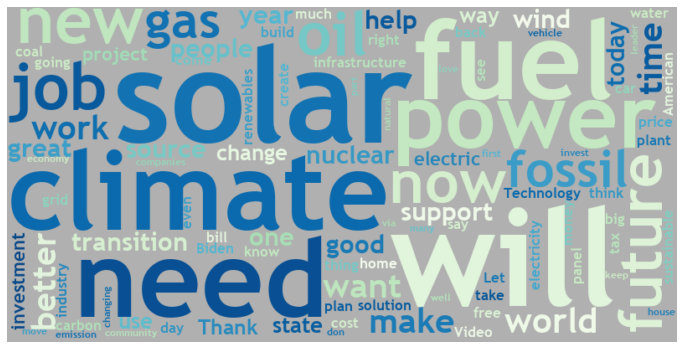

In [20]:
# Extract positive US tweets and run wordcloud function
us_positive = us_sentiment[us_sentiment['sentiment'] == 'positive']
create_wordcloud(us_positive['tweet'].values)

In [21]:
# View sample of tweets with frequent keywords
us_positive_tweet = us_positive[us_positive['tweet'].str.contains('fuel')]
pd.options.display.max_colwidth = 300
us_positive_tweet['tweet'].head(10)

6                                                                Presumably, inflation also causes fossil fuel prices to rise. So, inflation should be unimportant when comparing a new FF power plant to a new renewable plant. They must be talking about comparing new renewable to existing FF.
71                                                                         Let me preface this by saying I hope it works out and 12 is back (happy as well), but this from is spot on and not said enough. I think it all goes back to being fueled by grudges. Truly a renewable source of energy.
88                                         Delaware is a leading the way on clean energy. Today, I toured ’s Innovation Campus here in Newark to learn about the great work they are doing and discuss my legislation to help local companies produce cleaner hydrogen to fuel our cars and trucks!
97                                                                                                                          

[('will', 158), ('oil', 153), ('need', 117), ('climate', 116), ('fuel', 109)]


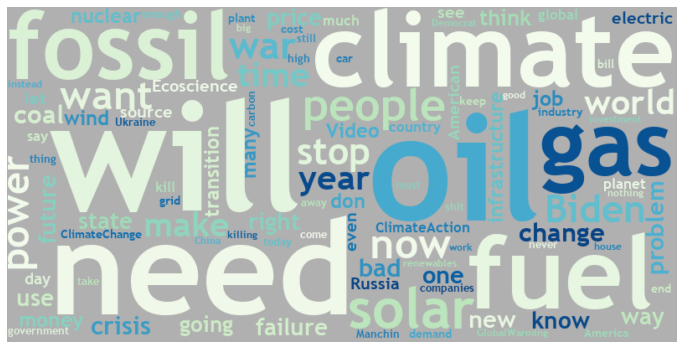

In [22]:
# Extract negative US tweets and run wordcloud function
us_negative = us_sentiment[us_sentiment['sentiment'] == 'negative']
create_wordcloud(us_negative['tweet'].values)

In [23]:
# View sample of tweets with frequent keywords
us_negative_tweet = us_negative[us_negative['tweet'].str.contains('climate')]
pd.options.display.max_colwidth = 300
us_negative_tweet['tweet'].head(10)

165                        #KamalaHarrisracist now? She intolerant? I didn't HEAR her mention black and brown people, systemmatic racism; how about climate change/green energy, BLM, Kavanaugh, packing the court, voting suppression, etc.?! Aren't those her "go-to" subjects? 🤣🇺🇸 #BorderCrisis
318        WHY would any “sane,”practical, NOT profit-driven society spend millions toward ANY new #FossiFuel pipelines (creating and wasting billions in “stranded assets”) when ALL #climate warnings demand #renewableenergy #infrastructure NOW?! #StopLine3 #Reconciliation like #GOP! #mapoli
333                             “#Innovation and #investment in #mining, pressure on the politics of #landuse and new catalysts for private investment, especially in #emergingmarkets, are less iconic. But they are no less necessary.” #energytransition #climatechange #renewables #cleanenergy
524        We need to transition to renewables immediately in order to fight against the climate crisis. Walmart: use your w

## State-Aggregated Analysis (Excl. Mexico and Canada)

### Tweet Volume Aggregated by State

In [24]:
# Aggregate tweet volume by state
state_vol = us_sentiment['state'].value_counts()
state_vol = pd.DataFrame({'state': state_vol.index, 'count': state_vol.values})
state_vol = state_vol[state_vol['state'].str.len() == 2]
state_vol['proportion'] = round(((state_vol['count']/state_vol['count'].sum())*100), 2)
print(len(state_vol))
state_vol.head(10)


48


,state,count,proportion
0,CA,1224,13.17
1,TX,807,8.68
2,NY,736,7.92
3,FL,561,6.04
4,WA,488,5.25
5,CT,367,3.95
6,OH,361,3.88
7,PA,345,3.71
9,IL,295,3.17
10,MA,272,2.93


In [25]:
# Plot proportion of US state volume in choropleth
fig = go.Figure(data = go.Choropleth(
    locations = state_vol['state'],
    z = state_vol['proportion'].astype(float),
    locationmode = 'USA-states', # Region to display
    colorscale = 'Sunset',
    autocolorscale = False,
    text = state_vol['state'], # Hover text
    marker_line_color = 'gray', # Line markers between states
    colorbar_title = 'Tweet Volume (%)',
    colorbar = dict(len = 0.5)
))

# Add state abbrieviations to chart
fig.add_scattergeo(
    locations = state_vol['state'],
    locationmode = 'USA-states',
    text = state_vol['state'],
    textfont = dict(size = 10),
    textposition = 'top center',
    mode = 'text')

# Add volume proportion values to chart
fig.add_scattergeo(
    locations = state_vol['state'],
    locationmode = 'USA-states',
    text = state_vol['proportion'],
    textfont = dict(size = 9),
    textposition = 'bottom center',
    mode = 'text')

fig.update_traces(showlegend = False)

# Plot design
fig.update_layout(height = 600,
    margin = dict(l = 40, r = 40, t = 20, b = 0),
    font = dict(size = 12),
    title = {'text':'Tweet Volume by State (%)',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5},
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'))
)

# Display chart and save as png
fig.show()
pio.write_image(fig, 'US State Volume.png', width = 1800, height = 800)

### Average Sentiment Aggregated by State

In [26]:
# Aggregate by state and find average of compound scores
state_sentiment = round(us_sentiment.groupby(['state'])['compound'].mean(), 3)
state_sentiment = pd.DataFrame({'state': state_sentiment.index, 'average_sentiment': state_sentiment.values})
state_sentiment = state_sentiment[state_sentiment['state'].str.len() == 2]
state_sentiment.head(10)

,state,average_sentiment
0,AL,0.408
1,AR,0.591
2,AZ,0.435
8,CA,0.471
9,CO,0.517
10,CT,0.356
14,DE,0.525
17,FL,0.467
19,GA,0.448
21,IA,0.366


In [27]:
# View average, highest, and lowest compound score by state
print(state_sentiment['average_sentiment'].mean().round(3))
print(state_sentiment['average_sentiment'].max())
print(state_sentiment['average_sentiment'].min())


0.454
0.754
0.201


In [28]:
# 5 highest average sentiment
state_sentiment.nlargest(5, ['average_sentiment'])

,state,average_sentiment
79,VT,0.754
84,WY,0.613
1,AR,0.591
75,UT,0.555
55,OK,0.549


In [29]:
# 5 lowest average sentiment
state_sentiment.nsmallest(5, ['average_sentiment'])

,state,average_sentiment
65,SD,0.201
49,NM,0.313
33,ME,0.329
26,KS,0.340
45,ND,0.349


In [30]:
# Plot US state sentiments in choropleth
fig = go.Figure(data = go.Choropleth(
    locations = state_sentiment['state'],
    z = state_sentiment['average_sentiment'].astype(float),
    locationmode = 'USA-states', # Region to display
    colorscale = 'RdBu',
    autocolorscale = False,
    text = state_sentiment['state'], # Hover text
    marker_line_color = 'gray', # Line markers between states
    colorbar_title = 'Average Sentiment Score',
    colorbar = dict(len = 0.5)
))

# Add state abbrieviations to chart
fig.add_scattergeo(
    locations = state_sentiment['state'],
    locationmode = 'USA-states',
    text = state_sentiment['state'],
    textfont = dict(size = 10),
    textposition = 'top center',
    mode = 'text')

# Add average sentiment values to chart
fig.add_scattergeo(
    locations = state_sentiment['state'],
    locationmode = 'USA-states',
    text = state_sentiment['average_sentiment'],
    textfont = dict(size = 9),
    textposition = 'bottom center',
    mode = 'text')

fig.update_traces(showlegend = False)

# Plot design
fig.update_layout(height = 600,
    margin = dict(l = 40, r = 40, t = 20, b = 0),
    font = dict(size = 12),
    title = {'text':'Average Tweet Sentiment by State',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5},
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        )
)

# Display chart and save as png
fig.show()
pio.write_image(fig, 'US State Sentiment.png', width = 1800, height = 800)

### Assigning States to Political Standing

In [31]:
## Assign Red vs Blue states
def state_label(row):
    if row['state'] == 'AZ' or row['state'] == 'CA' or row['state'] == 'CO' or row['state'] == 'CT' or row['state'] == 'DE' or row['state'] == 'GA' or row['state'] == 'HI' or row['state'] == 'IL' or row['state'] == 'ME' or row['state'] == 'MD' or row['state'] == 'MA' or row['state'] == 'MI' or row['state'] == 'MN' or row['state'] == 'NV' or row['state'] == 'NH' or row['state'] == 'NJ' or row['state'] == 'NM' or row['state'] == 'NY' or row['state'] == 'OR' or row['state'] == 'PA' or row['state'] == 'RI' or row['state'] == 'VT' or row['state'] == 'VA' or row['state'] == 'WA' or row['state'] == 'WI':
        return 'blue'
    else:
        return 'red'

In [32]:
# Average sentiment of Red and Blue states
state_sentiment['state_label'] = state_sentiment.apply(lambda row: state_label(row), axis = 1)
state_sentiment.groupby(['state_label']).mean().round(3)


,average_sentiment
state_label,
blue,0.460
red,0.448


# Europe Sentiment Analysis Breakdown

In [33]:
eu_sentiment = eu_df[['date_time', 'hashtags', 'tweet', 'compound', 'sentiment', 'coord', 'place']]
eu_sentiment

,date_time,hashtags,tweet,compound,sentiment,coord,place
0,2021-06-01 06:29:55+00:00,"['CopperPrice', 'China', 'ElectricCars']",#CopperPrice rise due to #China andGreenEnergy Policies All #ElectricCars require vast amounts for their motors House Building is at record levels across the UK more copper required LSE:SOLG SharePrice 34.7p A definite BUY,0.2732,positive,"Coordinates(longitude=-3.089731, latitude=53.274436)","Place(fullName='Neston, England', name='Neston', type='city', country='United Kingdom', countryCode='GB')"
1,2021-06-01 06:34:52+00:00,"['agreatleapforward', 'renewableenergy', 'Sustainability', 'AI']",Japan is to build a whole town as a pilot project for tomorrow’s technology #agreatleapforward #renewableenergy #Sustainability #AI,0.0000,neutral,"Coordinates(longitude=10.3293714, latitude=59.1318329)","Place(fullName='Nøtterøy, Norge', name='Nøtterøy', type='city', country='Norway', countryCode='NO')"
2,2021-06-01 06:42:27+00:00,['renewableenergy'],An example to others #renewableenergy,0.0000,neutral,"Coordinates(longitude=10.3293714, latitude=59.1318329)","Place(fullName='Nøtterøy, Norge', name='Nøtterøy', type='city', country='Norway', countryCode='NO')"
3,2021-06-01 07:42:10+00:00,"['solar', 'RenewableEnergy', 'Ireland', 'ClimateAction', 'EnergyTransition', '24hoursofsun']",A hazy start to the day but the sun breaking through now 🌤 ~6.3 kW from the home #solar PV at 08:40 ☀🌍 #RenewableEnergy #Ireland #ClimateAction #EnergyTransition #24hoursofsun,0.0000,neutral,"Coordinates(longitude=-7.0175074, latitude=52.1223805)","Place(fullName='Wexford, Ireland', name='Wexford', type='city', country='Ireland', countryCode='IE')"
4,2021-06-01 08:13:43+00:00,NaN,"I also recommend reading the AFBI publications - ""Anaerobic digestion (AD) collects methane and provides a source of renewable energy that is carbon neutral i.e. provides energy with no net increase in atmospheric CO2""",0.3691,positive,"Coordinates(longitude=-7.0175074, latitude=52.1223805)","Place(fullName='Wexford, Ireland', name='Wexford', type='city', country='Ireland', countryCode='IE')"
...,...,...,...,...,...,...,...
6692,2022-05-31 19:03:11+00:00,"['greenenergy', 'electricalchargers', 'warsaw']","How cool this bus charger looks! Less and fewer pollution, go green Warsaw! #greenenergy, #electricalchargers #warsaw",0.3987,positive,"Coordinates(longitude=20.8525518, latitude=52.0977088)","Place(fullName='Warsaw, Poland', name='Warsaw', type='city', country='Poland', countryCode='PL')"
6693,2022-05-31 19:54:13+00:00,"['green', 'renewables', 'ashp']",Oooh. Air source heat pump survey booked in for two weeks time. Still to be convinced it’s the right thing to but having rebuilt the house energy efficiently and move to solar it may well prove to be a sensible move. #green #renewables #ashp,0.8658,positive,"Coordinates(longitude=-1.93759, latitude=50.7095004)","Place(fullName='Bournemouth, England', name='Bournemouth', type='city', country='United Kingdom', countryCode='GB')"
6694,2022-05-31 20:33:03+00:00,NaN,"‘Burning trees in giant power stations like Drax is dirty and destructive. Drax has been named the UK's biggest CO2 polluter in 2020 yet the government hands it £2.7m a day to burn trees, harm wildlife, pollute communities and calls it 'green' energy’",-0.9325,negative,"Coordinates(longitude=-2.033651, latitude=52.381063)","Place(fullName='Birmingham, England', name='Birmingham', type='city', country='United Kingdom', countryCode='GB')"
6695,2022-05-31 20:44:52+00:00,"['SolarPV', 'solar', 'battery', 'Ireland', 'RenewableEnergy', 'ClimateAction', 'EnergyPrices']","The #SolarPV generated 66.64 kWh today between 05:35 and 21:15 (45.84 kWh ESE roof, 20.80 kWh WNW roof) 😎 In May the #solar + #battery allowed us to consume 60 kWh every day without using grid electricity ☀️ #Ireland #RenewableEnergy #ClimateAction #EnergyPrices",0.4588,positive,"Coordinates(longitude=-7.0175074, latitude=52.1223805)","Place(fullName='Wexford, Ireland', name='Wexford', type='ci

In [34]:
# Extract country and country code info using Regex
eu_sentiment['country'] = eu_sentiment['place'].astype(str).str.extract(r"country='(.*?)'")
# Extract country code
eu_sentiment['country_code'] = eu_sentiment['place'].astype(str).str.extract(r"countryCode='(.*?)'")
eu_sentiment.head()

/var/folders/sb/3twt_ybj4d93rbpp0wlzly0w0000gn/T/ipykernel_19680/2996523833.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/sb/3twt_ybj4d93rbpp0wlzly0w0000gn/T/ipykernel_19680/2996523833.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date_time,hashtags,tweet,compound,sentiment,coord,place,country,country_code
0,2021-06-01 06:29:55+00:00,"['CopperPrice', 'China', 'ElectricCars']",#CopperPrice rise due to #China andGreenEnergy Policies All #ElectricCars require vast amounts for their motors House Building is at record levels across the UK more copper required LSE:SOLG SharePrice 34.7p A definite BUY,0.2732,positive,"Coordinates(longitude=-3.089731, latitude=53.274436)","Place(fullName='Neston, England', name='Neston', type='city', country='United Kingdom', countryCode='GB')",United Kingdom,GB
1,2021-06-01 06:34:52+00:00,"['agreatleapforward', 'renewableenergy', 'Sustainability', 'AI']",Japan is to build a whole town as a pilot project for tomorrow’s technology #agreatleapforward #renewableenergy #Sustainability #AI,0.0000,neutral,"Coordinates(longitude=10.3293714, latitude=59.1318329)","Place(fullName='Nøtterøy, Norge', name='Nøtterøy', type='city', country='Norway', countryCode='NO')",Norway,NO
2,2021-06-01 06:42:27+00:00,['renewableenergy'],An example to others #renewableenergy,0.0000,neutral,"Coordinates(longitude=10.3293714, latitude=59.1318329)","Place(fullName='Nøtterøy, Norge', name='Nøtterøy', type='city', country='Norway', countryCode='NO')",Norway,NO
3,2021-06-01 07:42:10+00:00,"['solar', 'RenewableEnergy', 'Ireland', 'ClimateAction', 'EnergyTransition', '24hoursofsun']",A hazy start to the day but the sun breaking through now 🌤 ~6.3 kW from the home #solar PV at 08:40 ☀🌍 #RenewableEnergy #Ireland #ClimateAction #EnergyTransition #24hoursofsun,0.0000,neutral,"Coordinates(longitude=-7.0175074, latitude=52.1223805)","Place(fullName='Wexford, Ireland', name='Wexford', type='city', country='Ireland', countryCode='IE')",Ireland,IE
4,2021-06-01 08:13:43+00:00,NaN,"I also recommend reading the AFBI publications - ""Anaerobic digestion (AD) collects methane and provides a source of renewable energy that is carbon neutral i.e. provides energy with no net increase in atmospheric CO2""",0.3691,positive,"Coordinates(longitude=-7.0175074, latitude=52.1223805)","Place(fullName='Wexford, Ireland', name='Wexford', type='city', country='Ireland', countryCode='IE')",Ireland,IE


In [35]:
# No. of wrongly classified country data
print(len(eu_sentiment.loc[eu_sentiment['country'] == 'United States']))

41


In [36]:
# Remove tweets with wrongly classified country data
indexNames = eu_sentiment[eu_sentiment['country'] == 'United States'].index
eu_sentiment.drop(indexNames, inplace = True)
eu_sentiment.reset_index(drop = True, inplace = True)
print(len(eu_sentiment))

6656


/var/folders/sb/3twt_ybj4d93rbpp0wlzly0w0000gn/T/ipykernel_19680/48188054.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
# Remove tweets with null country data
print(eu_sentiment['country_code'].isnull().sum())
eu_sentiment = eu_sentiment[eu_sentiment['country_code'].notna()]
print(eu_sentiment['country_code'].isnull().sum())

1
0


## Europe Sentiment Proportion

In [38]:
# Calculate Europe sentiment proportion
column_names = ['count', 'percentage']

eu_sentiment_count = eu_sentiment['sentiment'].value_counts()
eu_sentiment_proportion = round(eu_sentiment['sentiment'].value_counts(normalize = True) * 100, 2)

eu_sentiment_df = pd.concat([eu_sentiment_count, eu_sentiment_proportion], axis = 1, keys = column_names)
eu_sentiment_df

,count,percentage
positive,5023,75.48
neutral,1112,16.71
negative,520,7.81


In [39]:
# Plot Europe sentiment proportion in pie chart
pie_chart = px.pie(eu_sentiment_df,
    names = eu_sentiment_df.index,
    values = 'percentage',
    title = 'EU Sentiment Proportion',
    template = 'gridon',
    color_discrete_sequence = [px.colors.qualitative.Pastel[8], px.colors.qualitative.Pastel[0], px.colors.qualitative.Pastel[2]]
    )

# Plot design
pie_chart.update_traces(pull = [0.1, 0, 0, 0],
    text = eu_sentiment_df.index,
    textposition = 'outside',
    showlegend = False
    )

# Display chart and save as png
pie_chart.show()
pio.write_image(pie_chart, 'EU Sentiment Proportion.png', width = 400, height = 400)

## Word Frequency in Europe Tweets

[('solar', 1115), ('Ireland', 802), ('ClimateAction', 777), ('EnergyTransition', 724), ('home', 700)]


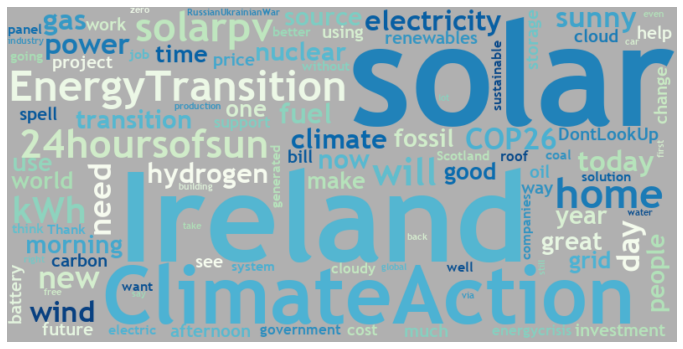

In [40]:
# Extract positive Europe tweets and run wordcloud function
eu_positive = eu_sentiment[eu_sentiment['sentiment'] == 'positive']
create_wordcloud(eu_positive['tweet'].values)

In [41]:
# View sample of tweets with frequent keywords
eu_positive_tweet = eu_positive[eu_positive['tweet'].str.contains('solar')]
pd.options.display.max_colwidth = 300
eu_positive_tweet['tweet'].head(10)

5                                                                                                                Cloudy but bright morning 🌥 ~6.3 kW from the home #solar PV at 10:31 ☀🌍 #RenewableEnergy #Ireland #ClimateAction #EnergyTransition #24hoursofsun
8                                                               The cloud is building and rain forecast but for now we have sunny spells 😎🌤 ~10.8 kW from the home #solar PV at 12:05 ☀🌍 #RenewableEnergy #Ireland #ClimateAction #EnergyTransition #24hoursofsun
9     How we fill our EV ! #ev #electriccars #ecocars #KiaENiro #PV #SolarPanels #orkney #sunshine #greenenergy #solarEnergy #energyUK #myenergi #EvWorldDay #renewables #environment #environmentalawareness #EVS #electriccaruk #zappi #myenergi #climatechange
10                                                                                                                Cloud with sunny spells 😎🌤 ~9.9 kW from the home #solar PV at 13:00 ☀🌍 #RenewableEnergy #Ireland #ClimateAction 

[('gas', 85), ('will', 83), ('fuel', 60), ('need', 59), ('price', 54)]


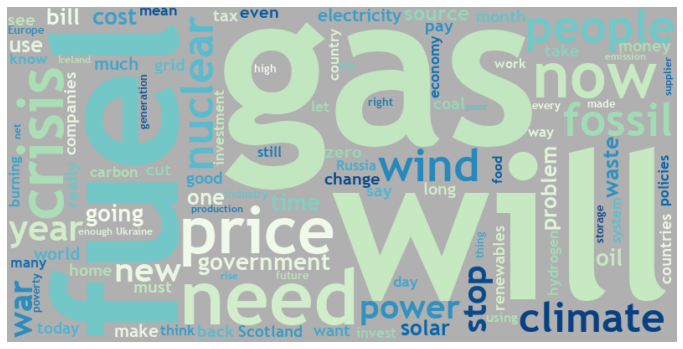

In [42]:
# Extract negative Europe tweets and run wordcloud function
eu_negative = eu_sentiment[eu_sentiment['sentiment'] == 'negative']
create_wordcloud(eu_negative['tweet'].values)

In [43]:
# View sample of tweets with frequent keywords
eu_negative_tweet = eu_negative[eu_negative['tweet'].str.contains('price')]
pd.options.display.max_colwidth = 300
eu_negative_tweet['tweet'].head(10)

291                                                                    generation as batteries and storage technology are incredible expensive and it's not clear, if prices keep falling exponentially as renewable folks anticipate. Finally: Is nuclear really so bad that this is desirable:
584                                       Just bought a large bag of carrots, parsnips, swede and broccoli for just over a pound. It is the mad green policies, pushed by the bien pensants reading this site, which is forcing up the price of energy which subsequently crippling the poorest.
1150                                                            Energy prices through the roof and going to get even worse with the Tories green policy’s, no pay rises, food prices up, lack of Doctors surgery’s, worst pension in Europe and they still want to give away more of our money 😡
1625                                                      Orkney is currently generating more renewable electricity than it is using 

## Country-Aggregated Analysis

### Tweet Volume Aggregated by Country

In [44]:
# Aggregate tweet volume by country
country_vol = eu_sentiment['country'].value_counts()
country_vol = pd.DataFrame({'country': country_vol.index, 'count': country_vol.values})
country_vol['proportion'] = round(((country_vol['count']/country_vol['count'].sum())*100), 2)
country_vol = (country_vol.merge(eu_sentiment, on = 'country', how = 'inner')).reindex(columns = ['country', 'country_code', 'count', 'proportion'])
country_vol.drop_duplicates(keep = 'first', inplace = True)
country_vol.reset_index(drop = True, inplace = True)
print(len(country_vol))
country_vol.head(10)

50


,country,country_code,count,proportion
0,United Kingdom,GB,3665,55.07
1,Ireland,IE,1298,19.50
2,Germany,DE,262,3.94
3,France,FR,168,2.52
4,Belgium,BE,152,2.28
5,The Netherlands,NL,136,2.04
6,Spain,ES,133,2.00
7,Turkey,TR,96,1.44
8,Italy,IT,92,1.38
9,Sweden,SE,91,1.37


In [45]:
# Plot proportion of Europe country volume in choropleth
fig = go.Figure(data = go.Choropleth(
    locations = country_vol['country'],
    z = country_vol['proportion'].astype(float),
    locationmode = 'country names', # Region to display
    colorscale = 'Sunset',
    autocolorscale = False,
    text = country_vol['country'], # Hover text
    marker_line_color = 'gray', # Line markers between countries
    colorbar_title = 'Tweet Volume (%)',
    colorbar = dict(len = 0.5)
))

# Add country codes to chart
fig.add_scattergeo(
    locations = country_vol['country'],
    locationmode = 'country names',
    text = country_vol['country_code'],
    textfont = dict(size = 10),
    textposition = 'top center',
    mode = 'text')

# Add volume proportion values to chart
fig.add_scattergeo(
    locations = country_vol['country'],
    locationmode = 'country names',
    text = country_vol['proportion'],
    textfont = dict(size = 9),
    textposition = 'bottom center',
    mode = 'text')

fig.update_traces(showlegend = False)

# Plot design
fig.update_layout(height = 1000,
    margin = dict(l = 40, r = 40, t = 20, b = 0),
    font = dict(size = 12),
    title = {'text':'Tweet Volume in European Countries',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5},
    geo = dict(
        scope='europe'
        )
)

# Display chart and save as png
fig.show()
pio.write_image(fig, 'Europe Country Volume.png', width = 1500, height = 1300)

### Average Sentiment Aggregated by Country

In [46]:
# Aggregate by country and find average of compound scores
country_sentiment = round(eu_sentiment.groupby(['country','country_code'])['compound'].mean(), 3).to_frame(name = 'average_sentiment').reset_index()
print(len(country_sentiment))
country_sentiment.head(10)

50


,country,country_code,average_sentiment
0,,,0.718
1,Albania,AL,0.493
2,Algeria,DZ,0.530
3,Andorra,AD,0.557
4,Austria,AT,0.391
5,Belgium,BE,0.501
6,Bosnia and Herzegovina,BA,0.647
7,Bulgaria,BG,0.411
8,Cyprus,CY,0.463
9,Czech Republic,CZ,0.470


In [47]:
# View average, highest, and lowest compound score by country
print(country_sentiment['average_sentiment'].mean().round(3))
print(country_sentiment['average_sentiment'].max())
print(country_sentiment['average_sentiment'].min())

0.506
0.945
-0.084


In [48]:
# 5 highest average sentiment
country_sentiment.nlargest(5, ['average_sentiment'])

,country,country_code,average_sentiment
25,Lithuania,LT,0.945
29,Monaco,MC,0.858
28,Moldova,MD,0.822
26,Luxembourg,LU,0.787
35,Republic of Belarus,BY,0.746


In [49]:
# 5 lowest average sentiment
country_sentiment.nsmallest(5, ['average_sentiment'])

,country,country_code,average_sentiment
38,Republic of Slovenia,SI,-0.084
21,Isle of Man,IM,0.039
47,Turkey,TR,0.240
27,Malta,MT,0.354
16,Gibraltar,GI,0.372


In [50]:
# Plot Europe country sentiments in choropleth
fig = go.Figure(data = go.Choropleth(
    locations = country_sentiment['country'],
    z = country_sentiment['average_sentiment'].astype(float),
    locationmode = 'country names', # Region to display
    colorscale = 'RdBu',
    autocolorscale = False,
    text = country_sentiment['country'], # Hover text
    marker_line_color = 'gray', # Line markers between countries
    colorbar_title = 'Average Sentiment',
    colorbar = dict(len = 0.5)
))

# Add country codes to chart
fig.add_scattergeo(
    locations = country_sentiment['country'],
    locationmode = 'country names',
    text = country_sentiment['country_code'],
    textfont = dict(size = 10),
    textposition = 'top center',
    mode = 'text')

# Add average sentiment values to chart
fig.add_scattergeo(
    locations = country_sentiment['country'],
    locationmode = 'country names',
    text = country_sentiment['average_sentiment'],
    textfont = dict(size = 9),
    textposition = 'bottom center',
    mode = 'text')

fig.update_traces(showlegend = False)

# Plot design
fig.update_layout(height = 1000,
    margin = dict(l=40, r=40, t=20, b=0),
    font = dict(size=12),
    title = {'text':'Average Tweet Sentiment in European Countries',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5},
    geo = dict(
        scope='europe'
        )
)

# Display chart and save as png
fig.show()
pio.write_image(fig, 'Europe Country Sentiment.png', width = 1500, height = 1300)